<a href="https://colab.research.google.com/github/abay-qkt/python-visualization-tips/blob/main/matplotlib_seaborn_tips_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pandas.plot

## df.scatter：散布図

df.plot.scatterで散布図を描画できます。cオプションで、値を色で表すこともできます

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('iris') # サンプルデータフレーム

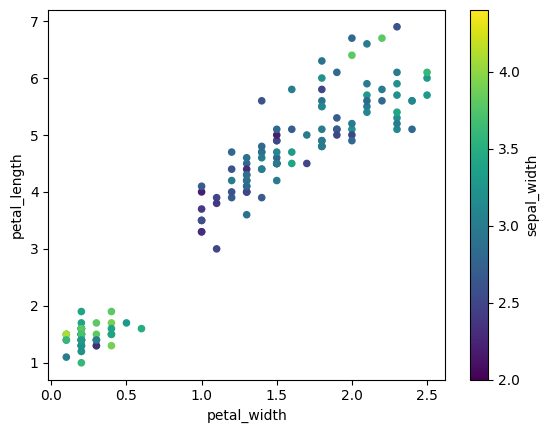

In [61]:
df.plot.scatter(x="petal_width",y="petal_length",c="sepal_width",colormap='viridis');

## df.plot subplotsオプション：カラム毎サブプロット自動生成

matplotlibで１から書くとやや面倒なsubplotsですが、pandasで簡単に作成できる場合もあります💡

多次元の時系列データを見るときに便利です。  


公式リファレンスはこちらです。
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [62]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("https://github.com/plotly/plotly.py/raw/master/packages/python/plotly/plotly/package_data/datasets/stocks.csv.gz")

In [63]:
df = px.data.stocks()
df.head(5)

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


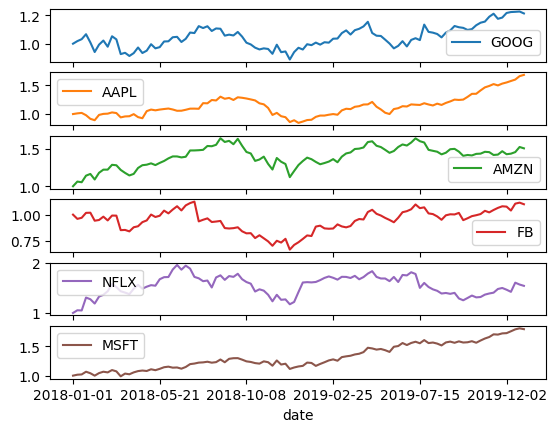

In [64]:
df.plot(x="date",subplots=True);

In [65]:
# df.plot(x="date",y=["GOOG","AAPL","AMZN","FB","NFLX","MSFT"],subplots=True); # yも指定可能
# df.set_index("date").plot(subplots=True); # デフォルトではx軸はindex

## df.hist by,columnオプション：列の値ごとにサブプロット生成

ヒストグラムを一気に作成できます💡  
・オプションを何も指定しなかった場合、数値列はすべてプロットされます    
・by, columnオプションを使用することで、byで指定した列の値ごとに、columnで指定した列をプロットできます

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [67]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


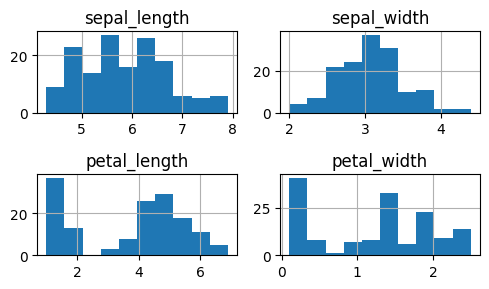

In [68]:
df.hist(layout=(2,2),figsize=(5,3));
plt.tight_layout();

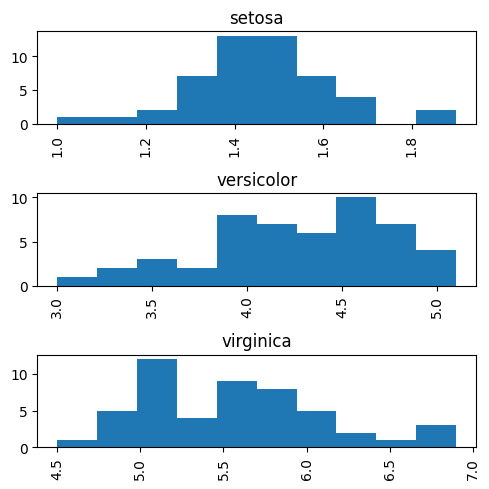

In [69]:
df.hist(by='species',column=["petal_length"],legend=False,layout=(3,1),figsize=(5,5));
plt.tight_layout();

## df.groupby.hist：列の値ごとに色を分けてプロット

グループごとに手軽に分布を確認する方法を紹介します💡  
df.groupby.histで、
グループごとに色分けしてヒストグラム表示できます。

https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.plot.html

https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.hist.html

In [70]:
# df.groupby("species").hist(legend=True, layout=(1,4),figsize=(16,2)); # 微妙

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris') # サンプルデータ（pd.DataFrame）

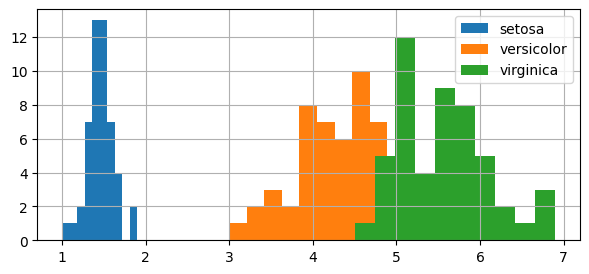

In [72]:
df.groupby("species")["petal_length"].hist(legend=True, figsize=(7,3));

## plotting_backend：プロットに使うライブラリを指定

pandasのoption.plotting.backendで、
df.plot()の時に使う可視化ライブラリを指定することができます。
デフォルトはmatplotlibですが、例えばplotlyに変えることもできます

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
- https://plotly.com/python/pandas-backend/

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = px.data.iris() # サンプルデータ

In [74]:
pd.options.plotting.backend = "plotly"

In [75]:
df.plot.scatter(x='sepal_width',y='sepal_length',color='species')

In [76]:
pd.options.plotting.backend="matplotlib"

# matplotlib

## Axes.remove：余分なグラフ枠の削除

subplots で作成した余分な Axes を remove() で簡単に除外できます！
中身のないグラフ枠を削除して、見やすいレイアウトに仕上げられます

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('iris') # サンプルデータフレーム

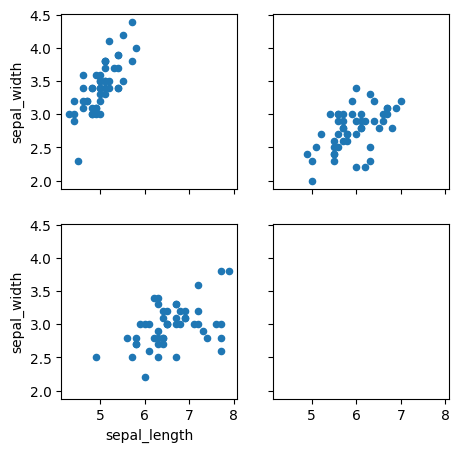

In [78]:
# removeを使わない場合
rownum = 2
colnum = 2
fig,ax = plt.subplots(rownum,colnum,sharex=True,sharey=True,figsize=(5,5))
for i,s in enumerate(df.species.unique()):
    df[df["species"]==s].plot.scatter(x="sepal_length",y="sepal_width",ax=ax[int(i/colnum)][i%colnum])

plt.show()

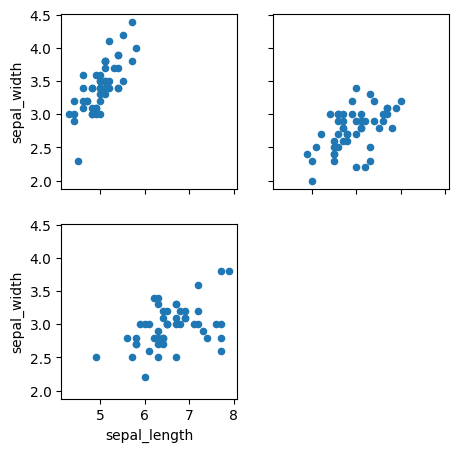

In [79]:
# removeを使った場合
rownum = 2
colnum = 2
fig,ax = plt.subplots(rownum,colnum,sharex=True,sharey=True,figsize=(5,5))
for i,s in enumerate(df.species.unique()):
    df[df["species"]==s].plot.scatter(x="sepal_length",y="sepal_width",ax=ax[int(i/colnum)][i%colnum])
ax[1][1].remove() # ブランクの除外
plt.show()

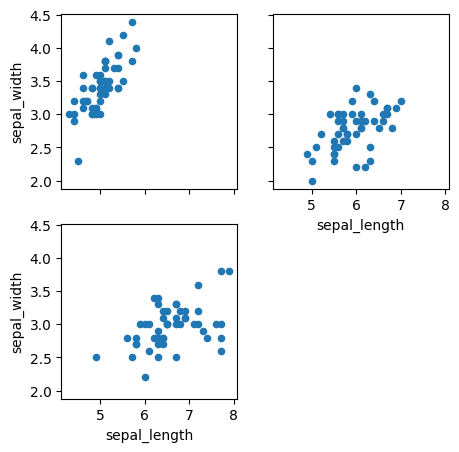

In [80]:
# 補足：add_subplotを使う場合。そもそも不要なグラフ枠は表示されない
fig = plt.figure(figsize=(5,5))
ax = None
for i,s in enumerate(df.species.unique()):
    ax = fig.add_subplot(2,2,i+1) if(not ax) else fig.add_subplot(2,2,i+1,sharex=ax,sharey=ax)
    df[df["species"]==s].plot(kind="scatter",x="sepal_length",y="sepal_width",ax=ax)
plt.show()

## tick_params(labelleft=True)：sharexを使ってもすべてのx軸を表示

sharexやshareyをTrueにすると、外側のAxesにしか軸の値が表示されなくなります。しかし、tick_paramsでlabel_bottomやlabel_leftをTrueに設定することで、個別のAxesにも軸の値を表示させることが可能です。

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('iris') # サンプルデータフレーム

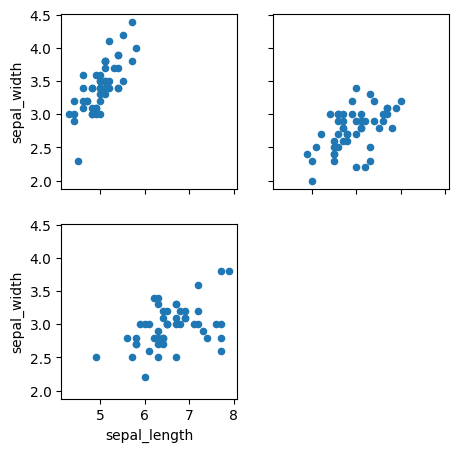

In [82]:
# tick_paramsを設定しない場合
rownum = 2
colnum = 2
fig,ax = plt.subplots(rownum,colnum,sharex=True,sharey=True,figsize=(5,5)) # sharex,shareyをTrueにして、軸をそろえる
for i,s in enumerate(df.species.unique()):
    df[df["species"]==s].plot.scatter(x="sepal_length",y="sepal_width",ax=ax[int(i/colnum)][i%colnum])


ax[1][1].remove() # ブランクの除外
plt.show()

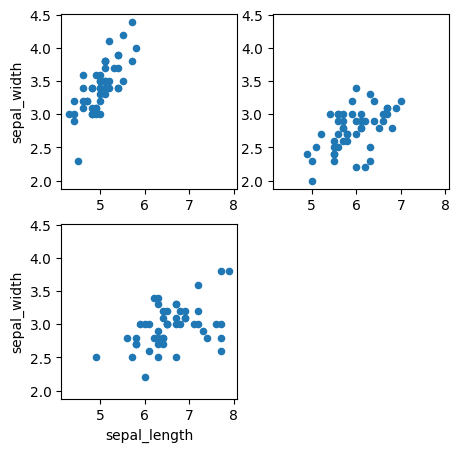

In [83]:
# # tick_paramsを設定した場合。すべての軸の値を表示させる
rownum = 2
colnum = 2
fig,ax = plt.subplots(rownum,colnum,sharex=True,sharey=True,figsize=(5,5))
for i,s in enumerate(df.species.unique()):
    df[df["species"]==s].plot.scatter(x="sepal_length",y="sepal_width",ax=ax[int(i/colnum)][i%colnum])
for i,s in enumerate(df.species.unique()):
    ax[int(i/colnum)][i%colnum].tick_params(labelleft=True,labelbottom=True) # x,y軸の表示
ax[1][1].remove() # ブランクの除外
plt.show()

## rcParams matplotlib：文字サイズなどのオプション設定
rcParamsでmatplotlibで描くプロットの設定を変えることができます。
フォントサイズを常に大きくしておきたい場合など便利です💡



In [84]:
import seaborn as sns
df = sns.load_dataset('iris') # サンプルデータフレーム

In [85]:
import matplotlib as mpl
mpl.rcParams['font.size']=20

# ↓これでもOK
# import matplotlib.pyplot as plt
# plt.rcParams['font.size']=20

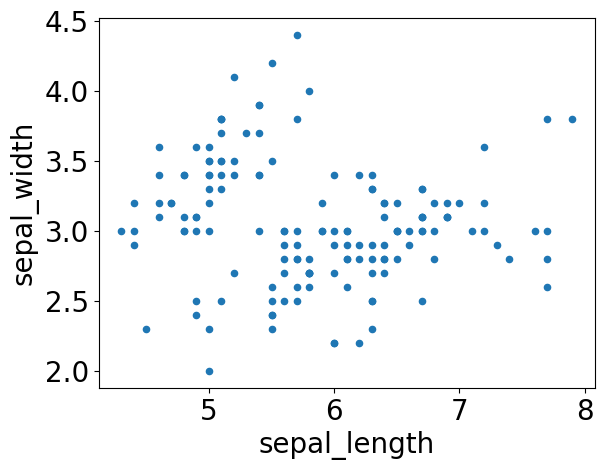

In [86]:
df.plot.scatter(x="sepal_length",y='sepal_width');

In [87]:
mpl.rcParams['font.size']=10

## with句 rc_context.rc_context：一時的にプロットの設定を変える

rc_contextで一時的にmatplotlibの設定を変更できます。
rcParamsを使ったやり方だと、以降のグラフすべてに設定が適用されますが、rc_cotextはwith文の中だけに適用されます

このグラフだけ文字大きくさせたい、みたいなときに便利です💡

https://matplotlib.org/stable/users/explain/customizing.html

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris') # サンプルデータフレーム

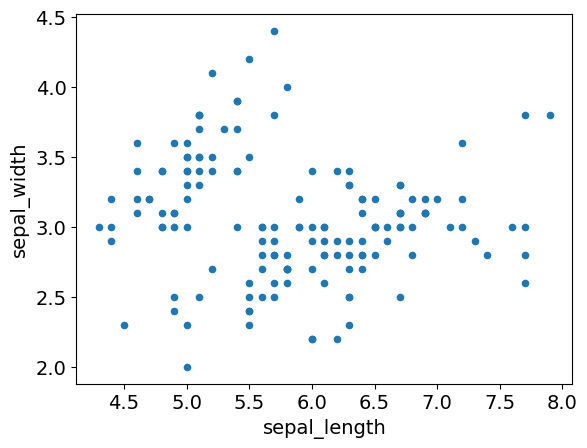

In [89]:
with plt.rc_context({'font.size':14}):
  df.plot.scatter(x="sepal_length",y='sepal_width');

## plt.style.use：スタイルの変更

matplotlibは、plt. style.use()で、スタイルを変更できるみたいです。
seabornやtableauみたいなスタイルも用意されています。

公式ドキュメントにスタイル一覧が掲載されています
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')

In [91]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


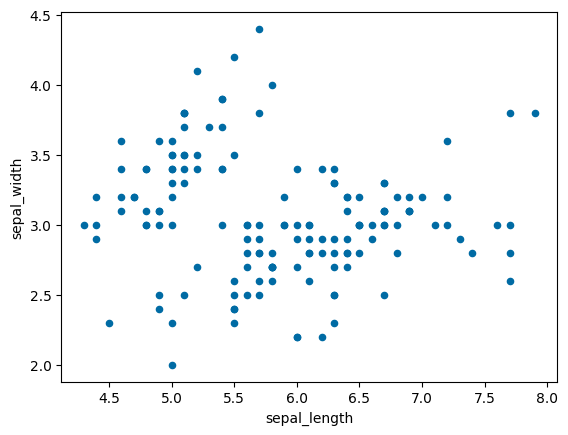

In [92]:
# styleの変更
plt.style.use('tableau-colorblind10')
df.plot.scatter(x="sepal_length",y='sepal_width');

In [93]:
plt.style.use('default')

# seaborn

## sns.scatter, kdeplot, histplot, boxplot, stripplot

簡単&見栄え良く可視化できるseabornの紹介です💡  
x：x軸の列を指定  
y：y軸の列を指定  
hue：色分けに使いたい列を指定  
data：データフレーム  
このオプションさえ覚えておけば、大抵のプロットは描けます！

In [94]:
import seaborn as sns
df = sns.load_dataset('iris') # サンプルデータフレーム

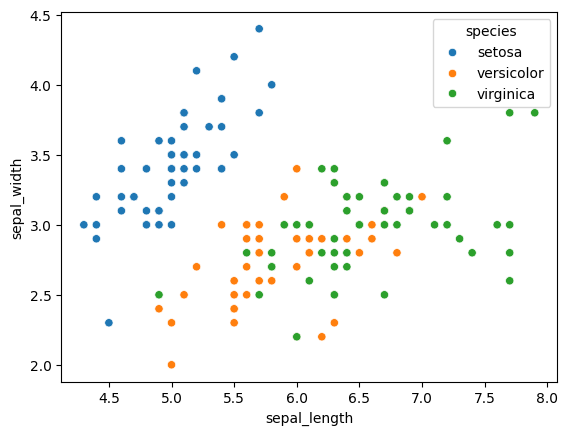

In [95]:
sns.scatterplot(x="sepal_length",y="sepal_width",hue="species",data=df);

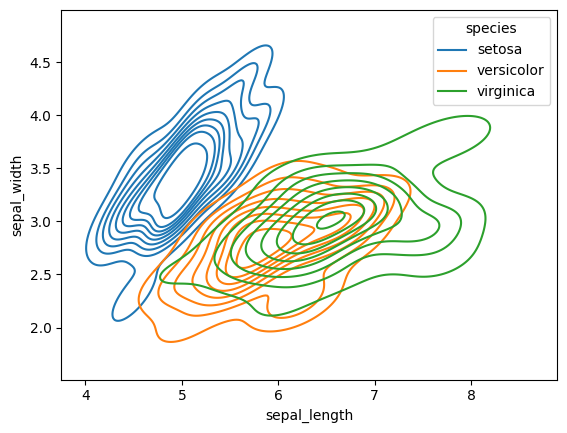

In [96]:
sns.kdeplot(x="sepal_length",y="sepal_width",hue="species",data=df);

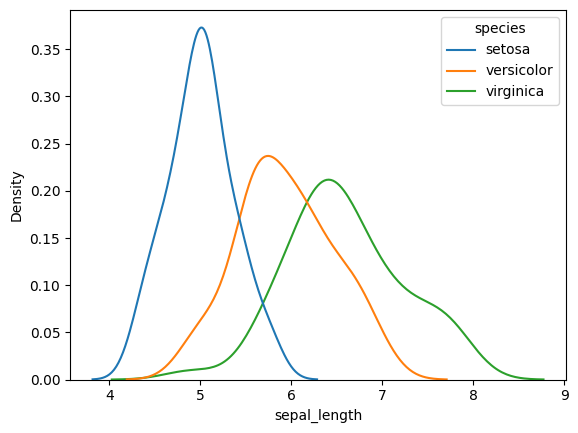

In [97]:
sns.kdeplot(x="sepal_length",hue="species",data=df);

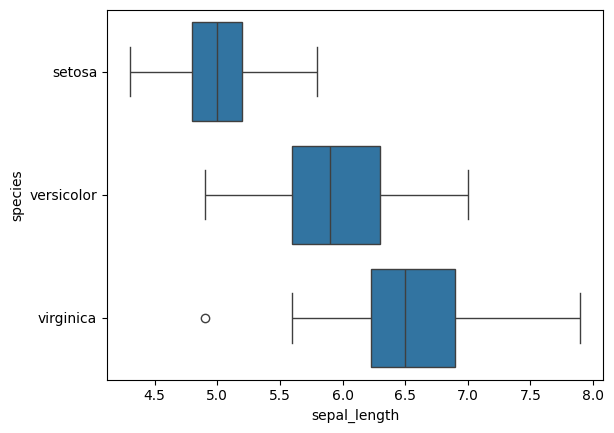

In [98]:
sns.boxplot(x="sepal_length",y="species",data=df);

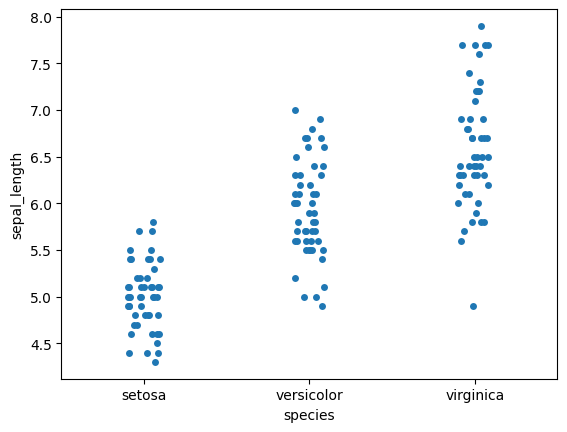

In [99]:
sns.stripplot(x="species",y="sepal_length",data=df);

## relplot：条件ごとグラフを分けて折れ線グラフや散布図を表示

seabornのrelplotを使えば、row,colオプションで指定したカラムの値ごとに、散布図や折れ線グラフを描くことができます。  
条件ごとにグラフを分けて見たい場合に便利です💡

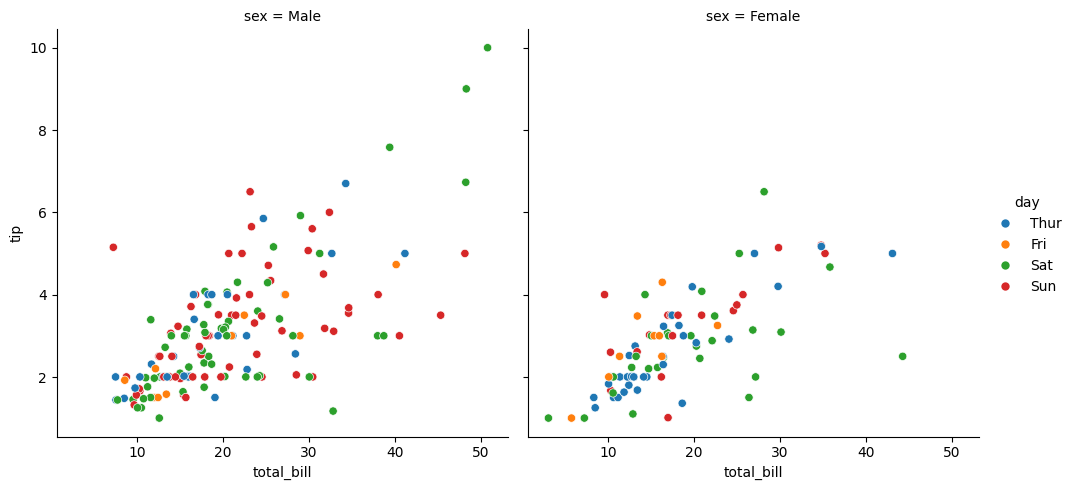

In [100]:
import seaborn as sns
df = sns.load_dataset('tips') # サンプルデータフレーム
sns.relplot(data=df, x="total_bill", y="tip", hue="day", col='sex');

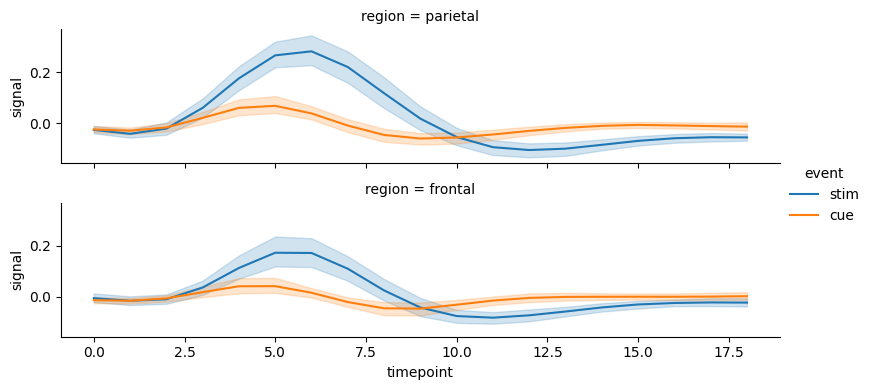

In [101]:
import seaborn as sns
df = sns.load_dataset("fmri")# サンプルデータフレーム
sns.relplot(
    data=df,
    kind="line", # line(折れ線グラフ) , scatter（散布図）が指定可能
    x="timepoint", y="signal", hue="event",
    row="region", # 縦方向に分けてみたいカラムを指定。同様にcolで横方向に分けてみたいカラムを指定可能
    height=2,aspect=4 # 表示サイズ
);

補足  
FacetGridでも、条件ごとにサブプロットの作成が可能ですが、  
relplotやcatplotを使うことが推奨されています。
- https://seaborn.pydata.org/generated/seaborn.relplot.html
  - https://seaborn.pydata.org/generated/seaborn.scatterplot.html
    - Using relplot() is safer than using FacetGrid directly, as it ensures synchronization of the semantic mappings across facets.
  - https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
    - When using seaborn functions that infer semantic mappings from a dataset, care must be taken to synchronize those mappings across facets (e.g., by defining the hue mapping with a palette dict or setting the data type of the variables to category). In most cases, it will be better to use a figure-level function (e.g. relplot() or catplot()) than to use FacetGrid directly.

## catplot：条件ごとにグラフを分けて箱ひげ図などを表示

seabornのcatplotを使えば、連続値vsカテゴリ値のグラフをrow,colで指定したカラムのカテゴリ値ごとに生成できます。  
連続値vs連続値の関係を見るrelplotとセットで覚えておくとよいと思います💡

https://seaborn.pydata.org/generated/seaborn.catplot.html

In [102]:
import seaborn as sns

In [103]:
df = sns.load_dataset("titanic") # サンプルデータ

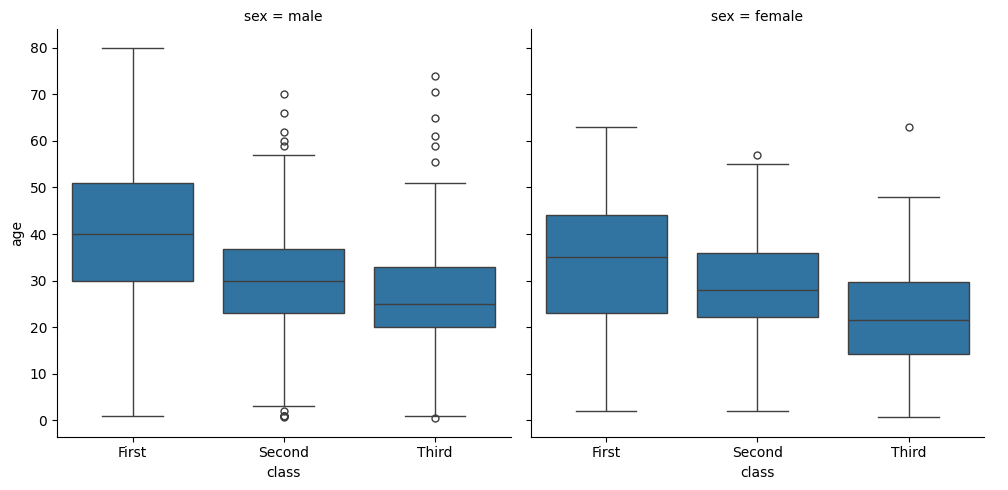

In [104]:
sns.catplot(data=df, y="age", x="class",col='sex', kind="box");

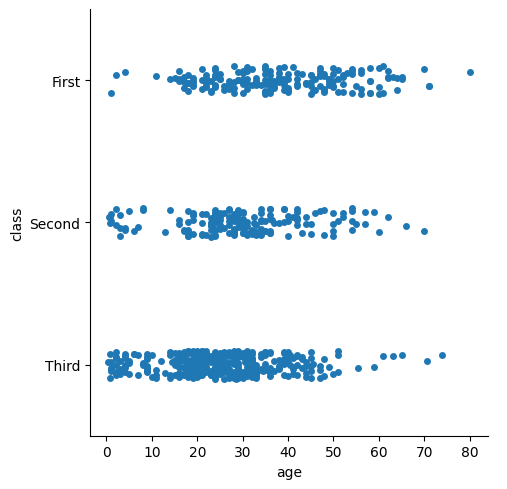

In [105]:
sns.catplot(data=df, x="age", y="class")

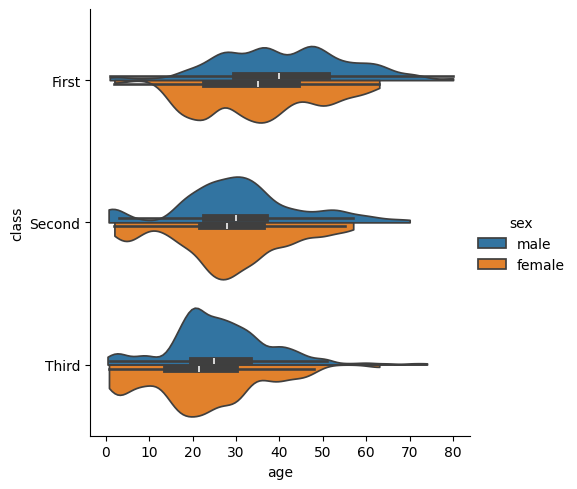

In [106]:
sns.catplot(
    data=df, x="age", y="class", hue="sex",
    kind="violin", bw_adjust=.5, cut=0, split=True,
)

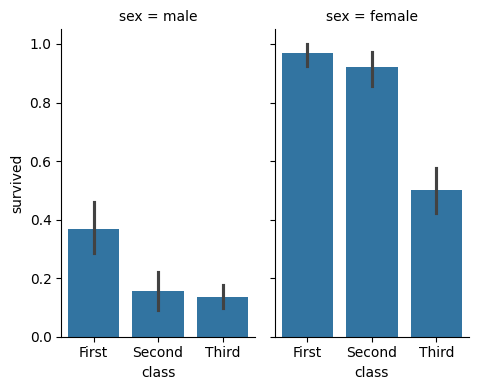

In [107]:
sns.catplot(
    data=df, x="class", y="survived", col="sex",
    kind="bar", height=4, aspect=.6,
);

<Axes: xlabel='age', ylabel='class'>

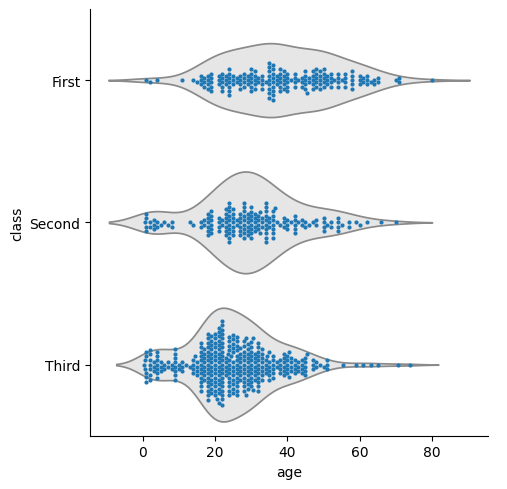

In [108]:
sns.catplot(data=df, x="age", y="class", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df, x="age", y="class", size=3)

## displot: 条件ごとにグラフを分けてヒストグラムなどを表示
https://seaborn.pydata.org/generated/seaborn.displot.html

In [109]:
import seaborn as sns
df = sns.load_dataset("titanic") # サンプルデータ

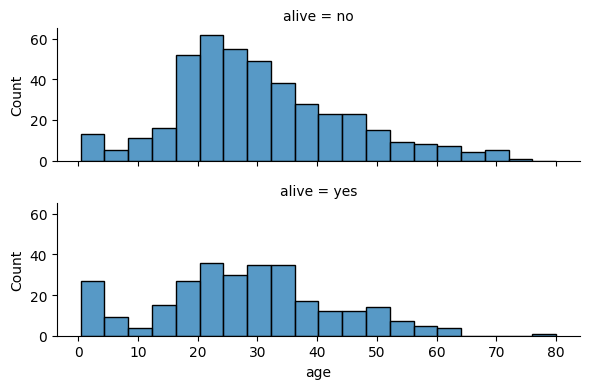

In [110]:
sns.displot(data=df, x="age", row='alive', kind="hist", height=2, aspect=3);

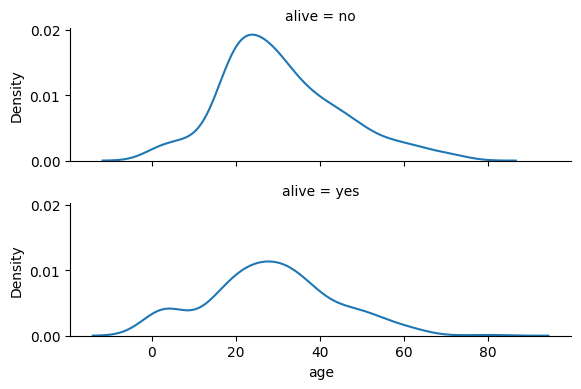

In [111]:
sns.displot(data=df, x="age", row='alive', kind="kde", height=2, aspect=3);

## sns.set_context：プロット全般の設定

seabornのマーカーやフォントのサイズはまとめて変更できます。

sns.set_context("poster")

サイズは、
paper, notebook, talk, poster
の4種類です！

パワポ用にプロットするときはtalkかposterに
しておくと便利だと思います💡

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris') # サンプルデータフレーム

paper


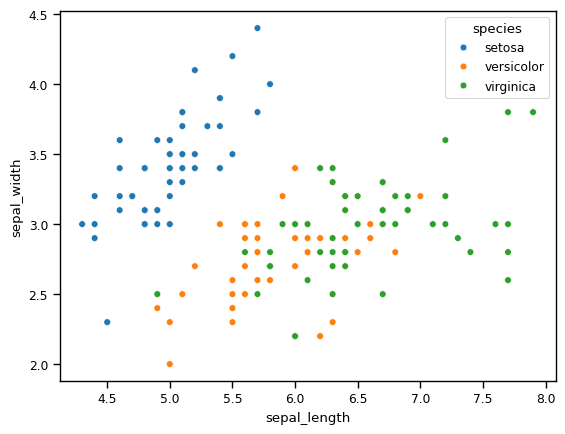

notebook


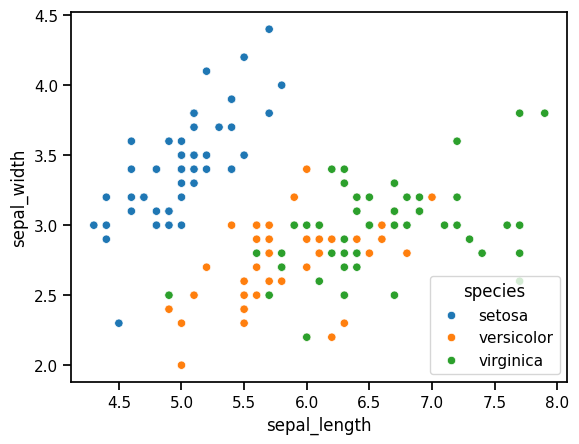

talk


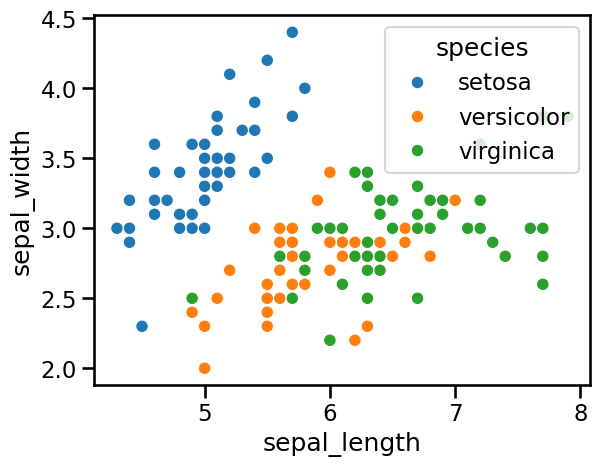

poster


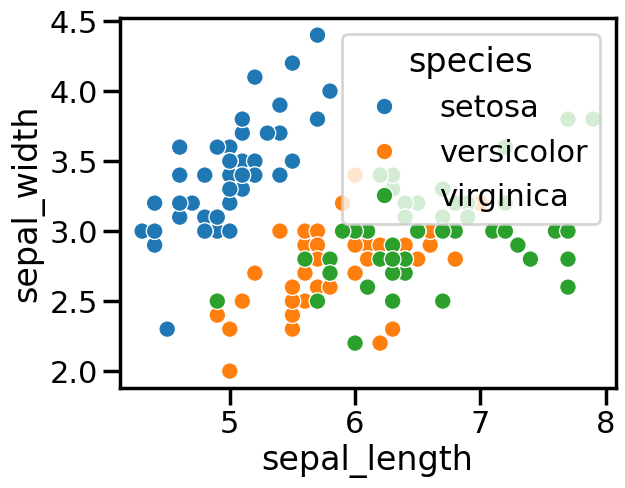

In [113]:
c_list = ["paper", "notebook", "talk", "poster"]
for c in c_list:
  print(c)
  sns.set_context(c)
  sns.scatterplot(x="sepal_length",y="sepal_width",hue="species",data=df);
  plt.savefig(c+".png")
  plt.show()

In [114]:
sns.reset_orig()# 元に戻す

## with句 sns.plotting_context()：一時的なプロット設定
sns.set_context()メソッドでは、  
以降描くプロットすべてにその設定が適用されますが、  
with文とsns.plotting_context()メソッドで、  
with文の中のプロットだけに設定を適用できます  

このプロットだけ大きく表示させたい、という時に便利です！

https://seaborn.pydata.org/generated/seaborn.plotting_context.html

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris') # サンプルデータフレーム

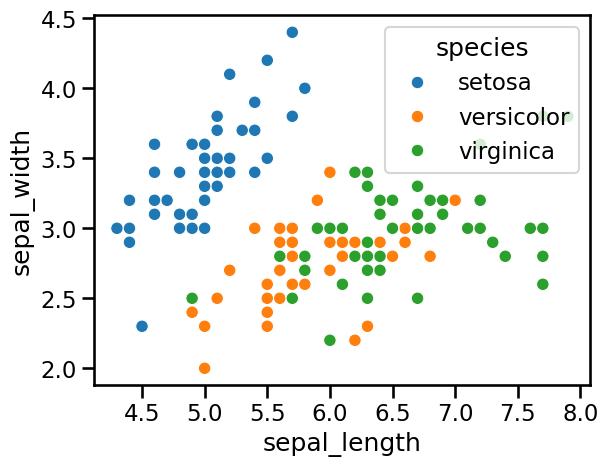

In [116]:
with sns.plotting_context("talk"):
  sns.scatterplot(x="sepal_length",y="sepal_width",hue="species",data=df);

## jointplot：散布図とヒストグラムなどをを同時に見られる

seabornだと、jointplot関数で散布図＋上と右にヒストグラム等を描けます💡  
plotly.expressだと、scatter関数のmarginal_x,yオプションで同じようなことができます


https://seaborn.pydata.org/generated/seaborn.jointplot.html

In [117]:
import seaborn as sns
df = sns.load_dataset("iris") # サンプルデータ

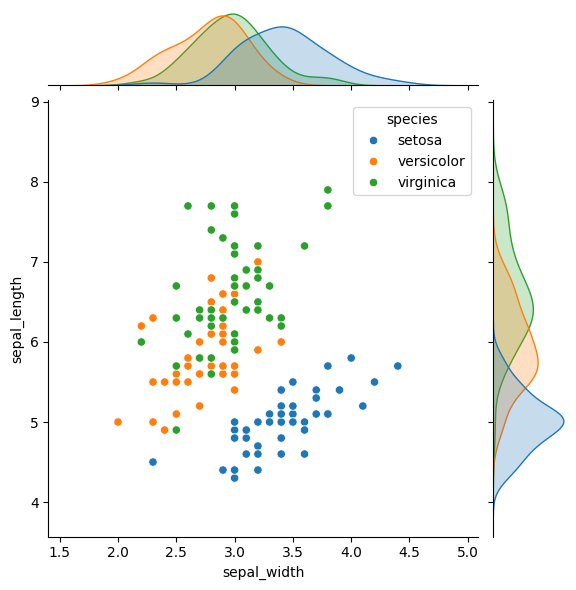

In [118]:
sns.jointplot(data=df, x="sepal_width", y="sepal_length",hue="species");